In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn 
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.ticker as mtick
%matplotlib inline 

# Understanding The Data 

In [2]:
data = pd.read_csv("C:/Users/AMIT KALAL/ProdigyInfoTech Tasks/IBM Sales Data.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data['SeniorCitizen'].sum()

1142

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data['PaymentMethod'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: PaymentMethod
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [7]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [8]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data['TotalCharges'].isnull().sum()

11

In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
Unique_value = data['PaymentMethod'].unique()

In [13]:
Unique_value

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
Unique_valu = data['MultipleLines'].unique()

In [15]:
Unique_valu

array(['No phone service', 'No', 'Yes'], dtype=object)

In [16]:
Unique_val = data['Contract'].unique()

In [17]:
Unique_valu

array(['No phone service', 'No', 'Yes'], dtype=object)

In [18]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


In [19]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

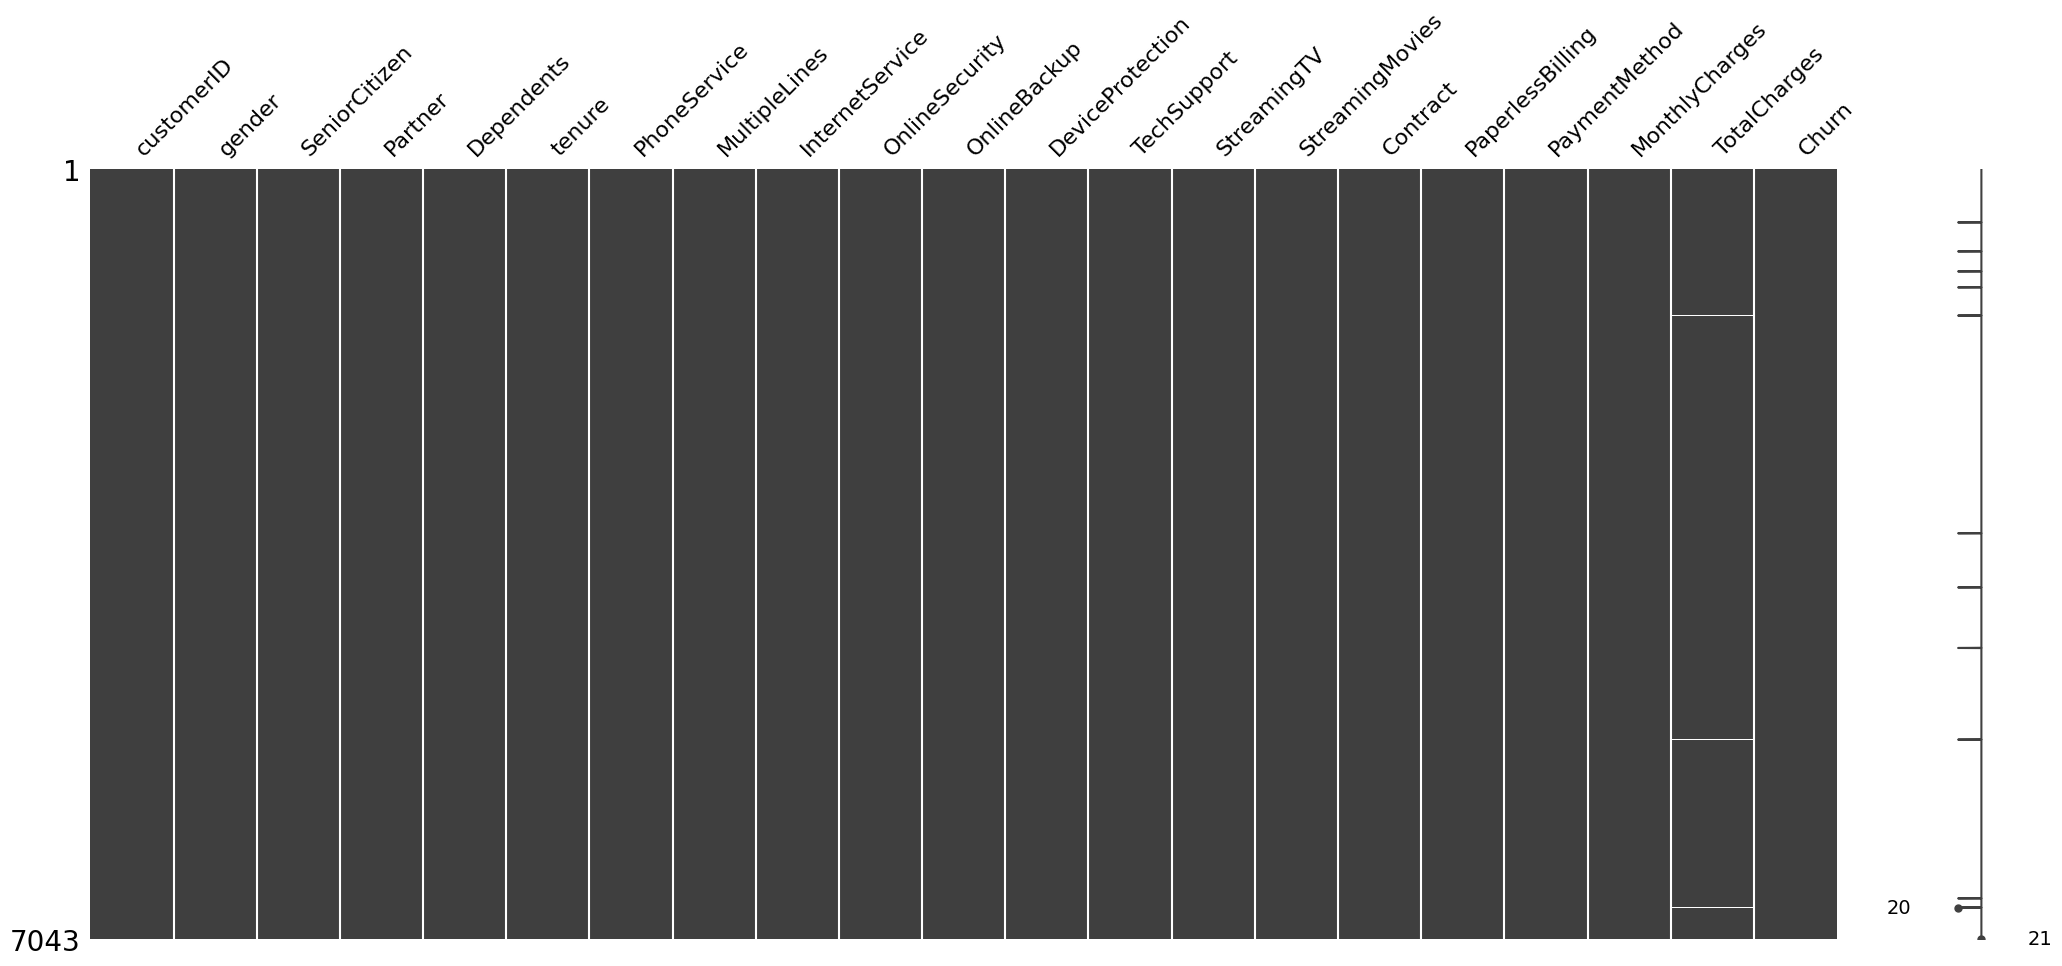

In [20]:
## Visualize missing values as a matrix
msno.matrix(data);

# Manipulation of Data

In [21]:
# Removing missing Values
data.dropna(inplace = True)

In [22]:
# Removing Customer ID column
df=data.drop(['customerID'] , axis = 1).copy()

In [23]:
# Change all the column from catergoroical to numerical
object_colums = df.select_dtypes(include=['object']).columns
for col in object_colums:
    le = LabelEncoder()
    df[col]=le.fit_transform(df[col])


In [24]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


After transforming all categorical data into numerical lets find out if there is any outlier that affect our visualisation 

gender                 Axes(0.125,0.786098;0.168478x0.0939024)
SeniorCitizen       Axes(0.327174,0.786098;0.168478x0.0939024)
Partner             Axes(0.529348,0.786098;0.168478x0.0939024)
Dependents          Axes(0.731522,0.786098;0.168478x0.0939024)
tenure                 Axes(0.125,0.673415;0.168478x0.0939024)
PhoneService        Axes(0.327174,0.673415;0.168478x0.0939024)
MultipleLines       Axes(0.529348,0.673415;0.168478x0.0939024)
InternetService     Axes(0.731522,0.673415;0.168478x0.0939024)
OnlineSecurity         Axes(0.125,0.560732;0.168478x0.0939024)
OnlineBackup        Axes(0.327174,0.560732;0.168478x0.0939024)
DeviceProtection    Axes(0.529348,0.560732;0.168478x0.0939024)
TechSupport         Axes(0.731522,0.560732;0.168478x0.0939024)
StreamingTV            Axes(0.125,0.448049;0.168478x0.0939024)
StreamingMovies     Axes(0.327174,0.448049;0.168478x0.0939024)
Contract            Axes(0.529348,0.448049;0.168478x0.0939024)
PaperlessBilling    Axes(0.731522,0.448049;0.168478x0.0

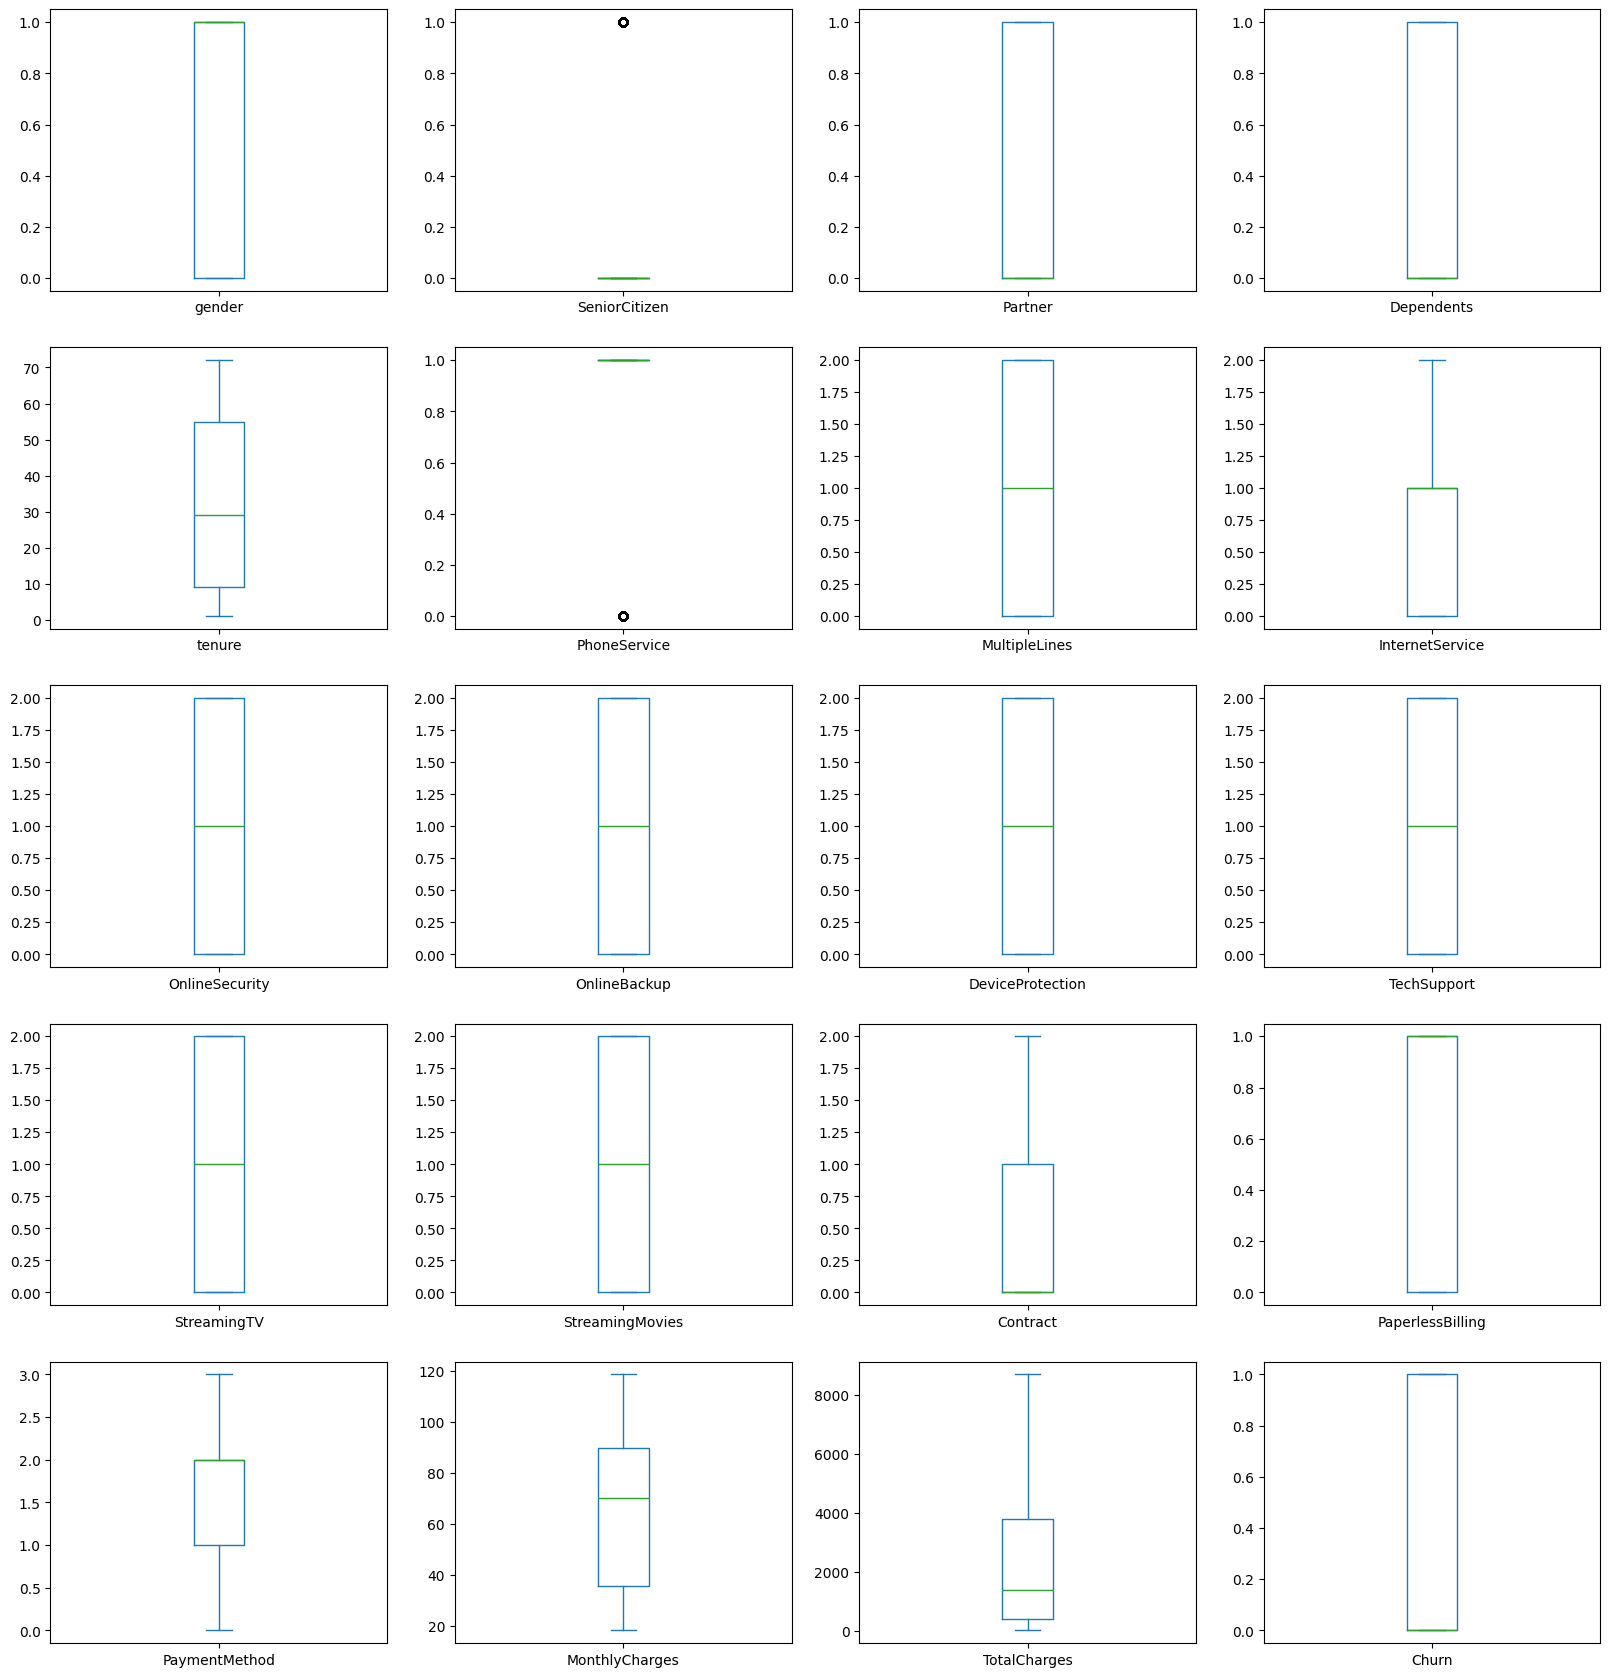

In [26]:
# for finding an outlier I'll use boxplot all for all the columns at once
df.plot(kind='box',subplots = True , layout=(7,4),figsize=(20,30))

In [27]:
qi=df['PhoneService'].quantile(0.99)
qj=df['SeniorCitizen'].quantile(0.99)

In [28]:
# We don't see any over threshold, lets try another way
print(qi,qj)

1.0 1.0


In [29]:

df[df['SeniorCitizen']>qj]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


I think the outlier would not affect any visualization part.
Now lets find correlation between columns , we'll see that any of the Telecom service are correlated to the churn 

<Axes: >

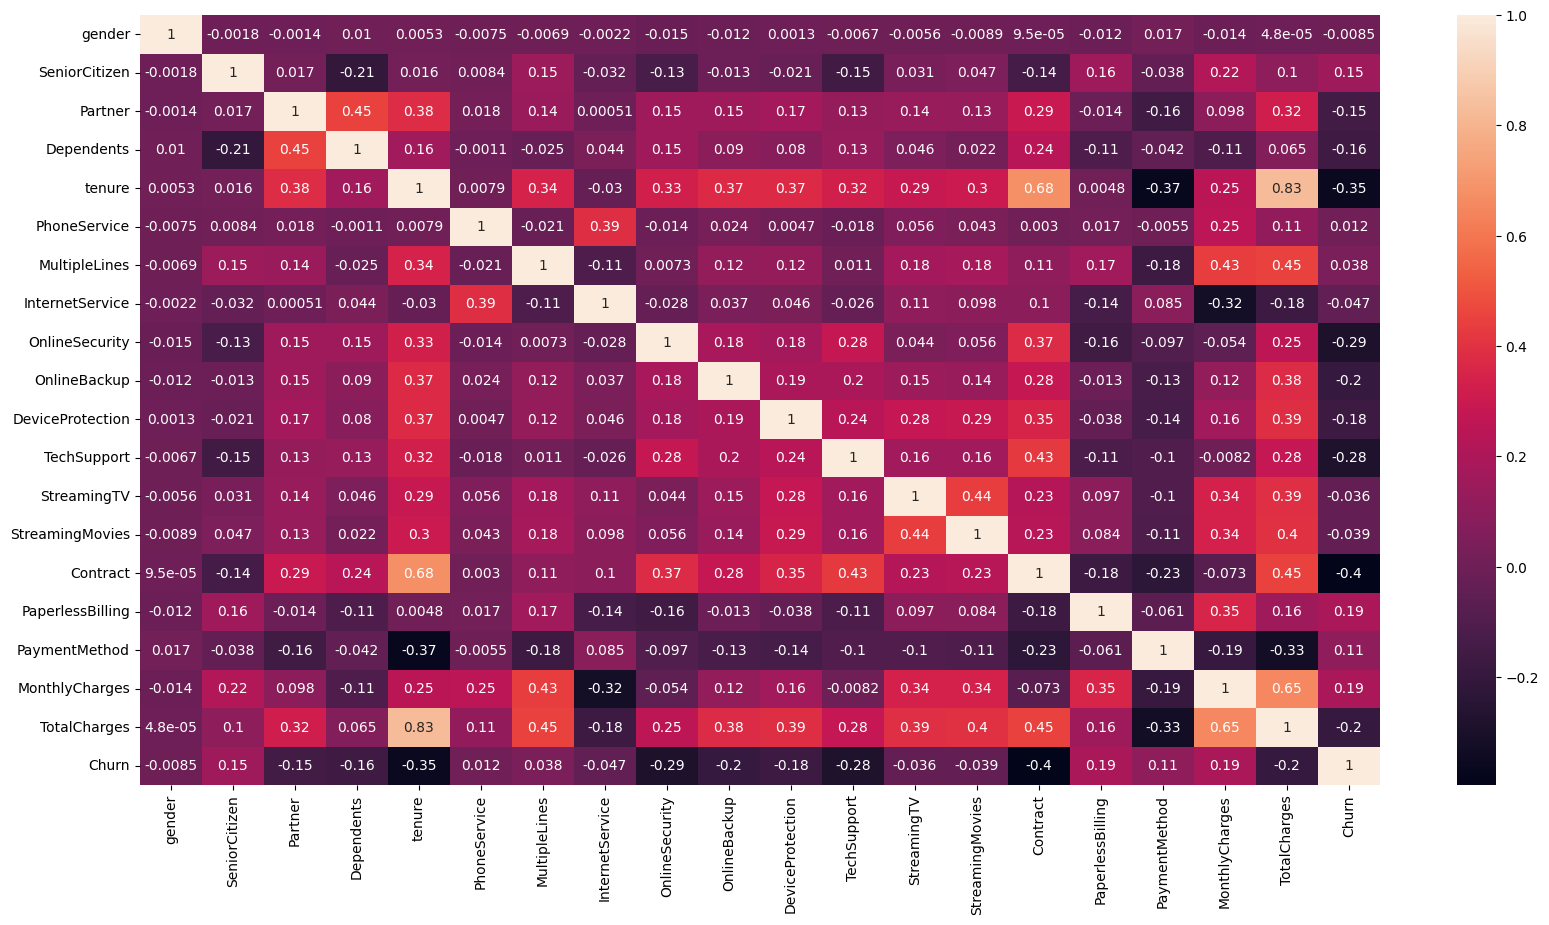

In [30]:
corelation = df.corr()
fig, ax =plt.subplots(figsize=(20,10))
sn.heatmap(corelation , annot = True)

In [31]:
#lets see get a better look at a correlation between churn and Telecom services

In [32]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [33]:
services = df[['Churn', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies','PhoneService']].corr()

<Axes: >

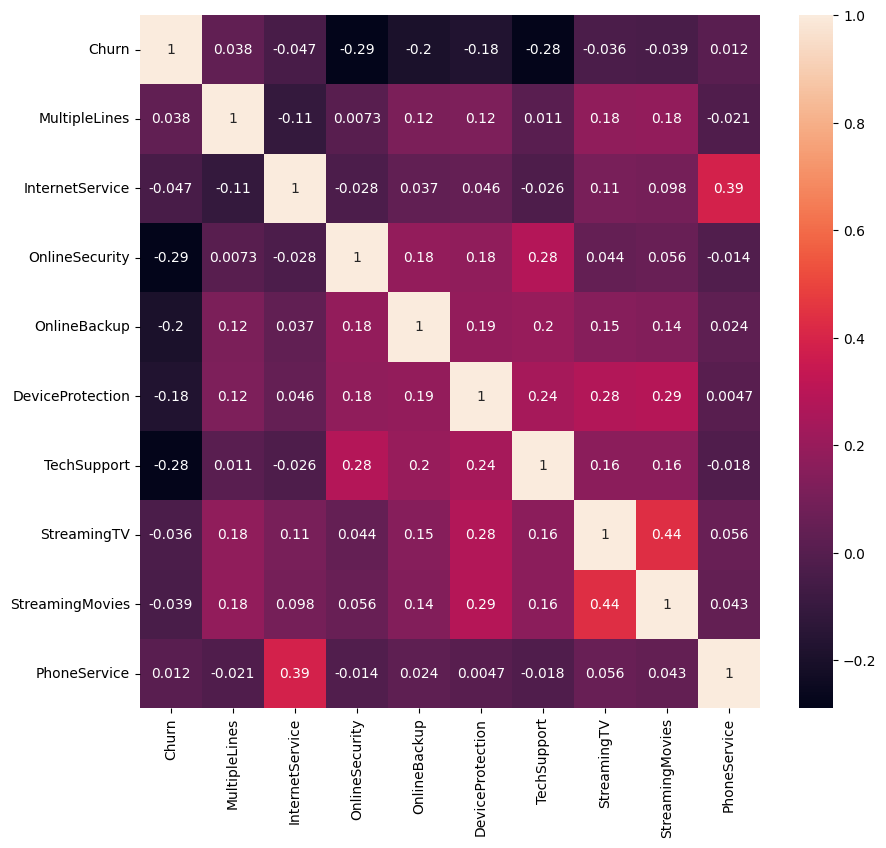

In [34]:
fig,ax=plt.subplots(figsize=(10,9))
sn.heatmap(services , annot = True)

Looking at The correlation matrix with visualizing with heatmap 
* The findings Are
  1) Churn with Multiples lines :-
     There is a weak posivtive correlation of 0.04 having multiple lines and My analysis suggest that having multiple lines is slightly associated with a higher likelyhood of churn.
  2) Churn With Rest of The services:-
     There is weak negative correlation with internet service and strong negatice correaltionn with OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport its suggest that is a lower likelyhood of churn in these areas of features.
There is a weak positive correlation with phone service that is 0.01 

# Data Visualisation 
Now let's visualize the data the and explore more pattern in the dataset with the help of the visualization 
* First we will look at distribution of individual variable and then slice and dice our data for any intresting trend
  1) lets us first understand the gender , patner and dependent state of
     customers
     lest start with GENDER DISTRIBUTION

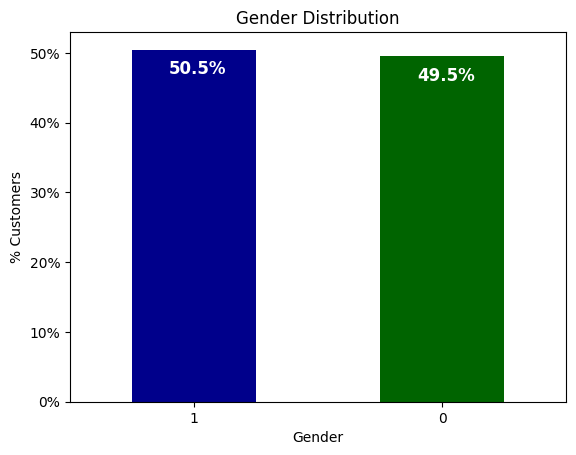

In [35]:
colors =['darkblue','darkgreen'] 
ax = (df['gender'].value_counts()*100.0/len(data)).plot(kind='bar',stacked=True,rot=0,color= colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')
# creating a list to collect plt.patches data
totals=[]

for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15,i.get_height()-3.5,\
           str(round((i.get_height()/total),1))+'%',
           fontsize = 12,
            color = 'white',
           weight = 'bold')

In [36]:
object_col = data.select_dtypes(include=['object']).columns
for col in object_col:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [37]:
# features
x = data[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
   
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y = data['Churn']

In [38]:
#spliting the dataset
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print('Training acc',train_accuracy)
print('test acc',test_accuracy)

Training acc 1.0
test acc 0.7356076759061834


In [40]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
model_rf.fit(x_train, y_train)


RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [42]:
from sklearn import metrics
prediction_test = model_rf.predict(x_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8116560056858564


<Axes: >

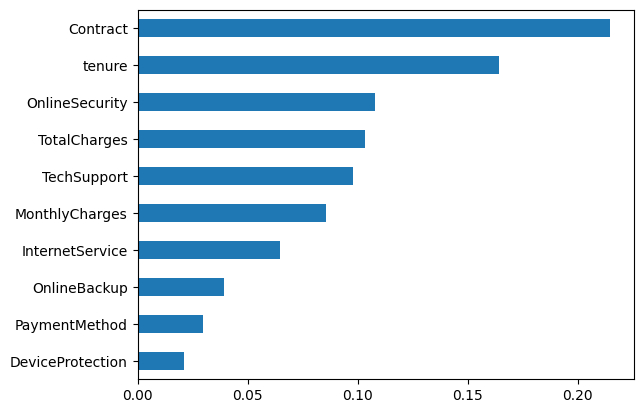

In [43]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=x.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')